In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
pd.set_option('display.max_columns', None)

from scipy.stats import norm
import statistics

In [2]:
df = pd.read_csv('2017-2021.csv')
df2 = pd.read_csv('Tinh.csv')

About the dataset: The score (on the scale of 10) of all students in 64 provinces in the entrance exam from 2017 - 2021

Note: NaN in this case means "did not attend". I won't remove them from the dataset as they have a meaning


# Data Preparation

In [3]:
df3 = df.merge(df2, on='MaTinh', how='outer')

In [4]:
df3.head()

,SBD,Toan,Van,Ly,Sinh,Ngoai ngu,Year,Hoa,Lich su,Dia ly,GDCD,MaTinh,TenTinh
0,8002816,7.8,8.25,7.50,7.0,6.2,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
1,8005707,3.0,3.25,2.75,3.0,3.2,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
2,8004883,6.0,5.25,NaN,NaN,4.8,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
3,8004786,2.4,3.75,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
4,8004225,4.2,4.00,NaN,NaN,3.0,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI


In [5]:
df3.rename(columns={'SBD':'ID', 'Toan':'Mathematics', 'Van':'Literature', 'Ly':'Physics'
                   , 'Sinh':'Biology', 'Ngoai ngu':'English', 'Hoa':'Chemistry', 'Lich su':'History'
                   , 'Dia ly': 'Geography', 'GDCD':'Civics', 'MaTinh':'ProvinceID', 'TenTinh':'ProvinceName'}, inplace=True)

In [6]:
df3

,ID,Mathematics,Literature,Physics,Biology,English,Year,Chemistry,History,Geography,Civics,ProvinceID,ProvinceName
0,8002816,7.8,8.25,7.50,7.0,6.2,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
1,8005707,3.0,3.25,2.75,3.0,3.2,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
2,8004883,6.0,5.25,NaN,NaN,4.8,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
3,8004786,2.4,3.75,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
4,8004225,4.2,4.00,NaN,NaN,3.0,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4199183,13003705,5.0,6.25,NaN,NaN,2.4,2020,NaN,2.75,7.00,8.25,13,TỈNH YÊN BÁI
4199184,13003706,4.8,4.50,NaN,NaN,3.0,2020,NaN,3.25,NaN,NaN,13,TỈNH YÊN BÁI
4199185,13003702,5.8,7.00,NaN,NaN,3.8,2020,NaN,6.75,7.75,9.25,13,TỈNH YÊN BÁI
4199186,13003707,5.4,5.00,NaN,NaN,3.6,2020,NaN,3.50,5.75,6.75,13,TỈNH YÊN BÁI


In [7]:
df3.shape

(4199188, 13)

In [8]:
df3.describe()

,ID,Mathematics,Literature,Physics,Biology,English,Year,Chemistry,History,Geography,Civics,ProvinceID
count,4.199188e+06,4.160555e+06,4.106933e+06,1.634963e+06,1.612363e+06,3.699259e+06,4.199188e+06,1.249962e+06,2.144812e+06,2.106039e+06,1.823629e+06,4.199188e+06
mean,2.879513e+07,5.834304e+00,5.923741e+00,5.801248e+00,5.006877e+00,4.660960e+00,2.019067e+03,5.881146e+00,4.618501e+00,6.360926e+00,7.796722e+00,2.878236e+01
std,1.891899e+07,1.889907e+00,1.457935e+00,1.709829e+00,1.428431e+00,1.982287e+00,1.438211e+00,1.771735e+00,1.631807e+00,1.339114e+00,1.289504e+00,1.892666e+01
min,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.017000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.300071e+07,4.400000e+00,5.000000e+00,4.500000e+00,4.000000e+00,3.200000e+00,2.018000e+03,4.500000e+00,3.500000e+00,5.500000e+00,7.000000e+00,1.300000e+01
50%,2.803499e+07,6.000000e+00,6.000000e+00,6.000000e+00,5.000000e+00,4.200000e+00,2.019000e+03,6.000000e+00,4.250000e+00,6.500000e+00,8.000000e+00,2.800000e+01
75%,4.500397e+07,7.400000e+00,7.000000e+00,7.250000e+00,5.750000e+00,5.800000e+00,2.020000e+03,7.250000e+00,5.500000e+00,7.250000e+00,8.750000e+00,4.500000e+01
max,6.400684e+07,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,2.021000e+03,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,6.400000e+01


In [9]:
df3.isna().sum()

ID                    0
Mathematics       38633
Literature        92255
Physics         2564225
Biology         2586825
English          499929
Year                  0
Chemistry       2949226
History         2054376
Geography       2093149
Civics          2375559
ProvinceID            0
ProvinceName          0
dtype: int64

In [10]:
df3.loc[df3.duplicated()]

,ID,Mathematics,Literature,Physics,Biology,English,Year,Chemistry,History,Geography,Civics,ProvinceID,ProvinceName
24886,8000201,7.4,6.75,5.5,6.25,4.2,2021,6.0,NaN,NaN,NaN,8,TỈNH LÀO CAI
25088,8000401,6.4,7.00,NaN,NaN,4.4,2021,NaN,7.00,8.00,8.75,8,TỈNH LÀO CAI
25303,8000601,4.6,5.50,NaN,NaN,3.6,2021,NaN,2.75,5.50,8.50,8,TỈNH LÀO CAI
25490,8000801,5.2,6.00,NaN,NaN,5.0,2021,NaN,6.25,8.00,9.75,8,TỈNH LÀO CAI
25768,8001001,7.0,7.00,NaN,NaN,4.2,2021,NaN,4.75,6.50,8.75,8,TỈNH LÀO CAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4170051,16013201,6.6,6.00,NaN,NaN,5.0,2021,NaN,3.50,5.25,8.50,16,TỈNH VĨNH PHÚC
4170416,16013401,8.2,7.50,NaN,NaN,6.0,2021,NaN,7.00,6.75,8.75,16,TỈNH VĨNH PHÚC
4170449,16013601,6.6,7.50,NaN,NaN,6.0,2021,NaN,5.50,8.25,8.25,16,TỈNH VĨNH PHÚC
4170659,16013801,4.8,6.75,NaN,NaN,3.4,2021,NaN,5.50,7.00,7.75,16,TỈNH VĨNH PHÚC


In [11]:
df3.query('ID == 8000201')

,ID,Mathematics,Literature,Physics,Biology,English,Year,Chemistry,History,Geography,Civics,ProvinceID,ProvinceName
2929,8000201,5.0,4.75,2.50,3.25,4.2,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
6474,8000201,5.4,7.50,NaN,NaN,3.4,2018,NaN,6.75,8.0,8.25,8,TỈNH LÀO CAI
12289,8000201,5.4,5.75,5.75,4.50,3.8,2019,5.0,NaN,NaN,NaN,8,TỈNH LÀO CAI
21701,8000201,3.8,5.50,NaN,NaN,4.2,2020,NaN,5.00,7.5,9.50,8,TỈNH LÀO CAI
24684,8000201,7.4,6.75,5.50,6.25,4.2,2021,6.0,NaN,NaN,NaN,8,TỈNH LÀO CAI
24886,8000201,7.4,6.75,5.50,6.25,4.2,2021,6.0,NaN,NaN,NaN,8,TỈNH LÀO CAI


In [12]:
df3 = df3.loc[~df3.duplicated(subset=['ID', 'Year'])].reset_index(drop=True).copy()

#Drop all the duplicated rows. It's loical that a person cannot take part in the exam 2 times in one year.

In [13]:
df3

,ID,Mathematics,Literature,Physics,Biology,English,Year,Chemistry,History,Geography,Civics,ProvinceID,ProvinceName
0,8002816,7.8,8.25,7.50,7.0,6.2,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
1,8005707,3.0,3.25,2.75,3.0,3.2,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
2,8004883,6.0,5.25,NaN,NaN,4.8,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
3,8004786,2.4,3.75,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
4,8004225,4.2,4.00,NaN,NaN,3.0,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194592,13003705,5.0,6.25,NaN,NaN,2.4,2020,NaN,2.75,7.00,8.25,13,TỈNH YÊN BÁI
4194593,13003706,4.8,4.50,NaN,NaN,3.0,2020,NaN,3.25,NaN,NaN,13,TỈNH YÊN BÁI
4194594,13003702,5.8,7.00,NaN,NaN,3.8,2020,NaN,6.75,7.75,9.25,13,TỈNH YÊN BÁI
4194595,13003707,5.4,5.00,NaN,NaN,3.6,2020,NaN,3.50,5.75,6.75,13,TỈNH YÊN BÁI


In [14]:
df3.duplicated().sum()

0

In [15]:
df3.dtypes

ID                int64
Mathematics     float64
Literature      float64
Physics         float64
Biology         float64
English         float64
Year              int64
Chemistry       float64
History         float64
Geography       float64
Civics          float64
ProvinceID        int64
ProvinceName     object
dtype: object

# Exploratory Data Analysis

In [16]:
df3.head()

,ID,Mathematics,Literature,Physics,Biology,English,Year,Chemistry,History,Geography,Civics,ProvinceID,ProvinceName
0,8002816,7.8,8.25,7.50,7.0,6.2,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
1,8005707,3.0,3.25,2.75,3.0,3.2,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
2,8004883,6.0,5.25,NaN,NaN,4.8,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
3,8004786,2.4,3.75,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI
4,8004225,4.2,4.00,NaN,NaN,3.0,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI


## Max score of each subject

In [17]:
df3.max()

ID                    64006838
Mathematics               10.0
Literature                10.0
Physics                   10.0
Biology                   10.0
English                   10.0
Year                      2021
Chemistry                 10.0
History                   10.0
Geography                 10.0
Civics                    10.0
ProvinceID                  64
ProvinceName    TỈNH ĐỒNG THÁP
dtype: object

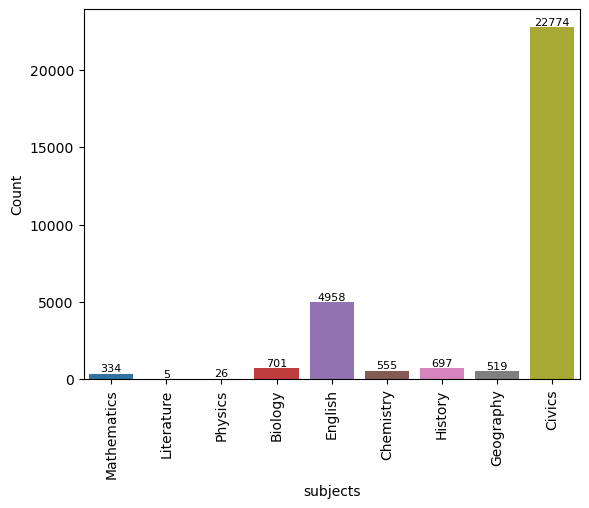

In [18]:
subjects = ['Mathematics', 'Literature', 'Physics', 'Biology', 'English', 'Chemistry', 'History', 'Geography', 'Civics']

def plot_max_10_count(data, columns):
    max_10_count = (data[columns].eq(10).sum()
                   .reset_index()
                   .rename(columns={'index': 'subjects', 0: 'Count'}))

    sns.barplot(x='subjects', y='Count', data=max_10_count)
    plt.xticks(rotation=90)
    
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=8)

    plt.show()
    
plot_max_10_count(df3, subjects)

Since 2017, Civics had been a subject that the majority of 10s came from. Before it was English. Low number of 10s were common among subjects involved much of maths and science. Literature is known to be extremely hard to get a 10

## Max score in each city

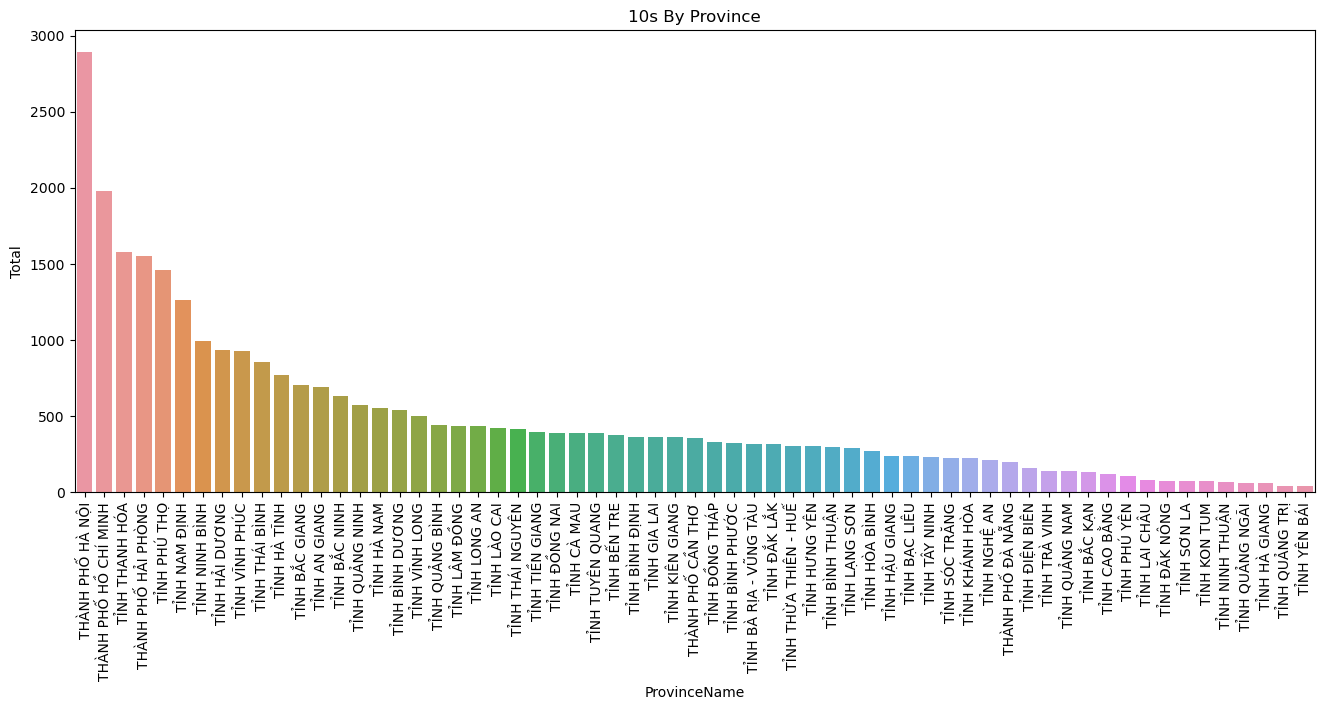

In [19]:
def plot_10s_by_province(data, subjects):
    by_province = data.groupby('ProvinceName').apply(lambda x: x[subjects].eq(10).sum()).reset_index()
    by_province['Total'] = by_province[subjects].sum(axis=1)

    plt.figure(figsize=(16, 6))
    bar = sns.barplot(x='ProvinceName', y='Total'
                      , data=by_province
                      , order=by_province.sort_values('Total', ascending=False).ProvinceName)

    plt.title('10s By Province')
    plt.xticks(rotation=90)
    plt.show()
    
plot_10s_by_province(df3, subjects)

Ha Noi and Ho Chi Minh are the 2 biggest cities in Vietnam. Therefore, it's understandable they had the highest number of 10s out of all the provinces

## Max score of each year

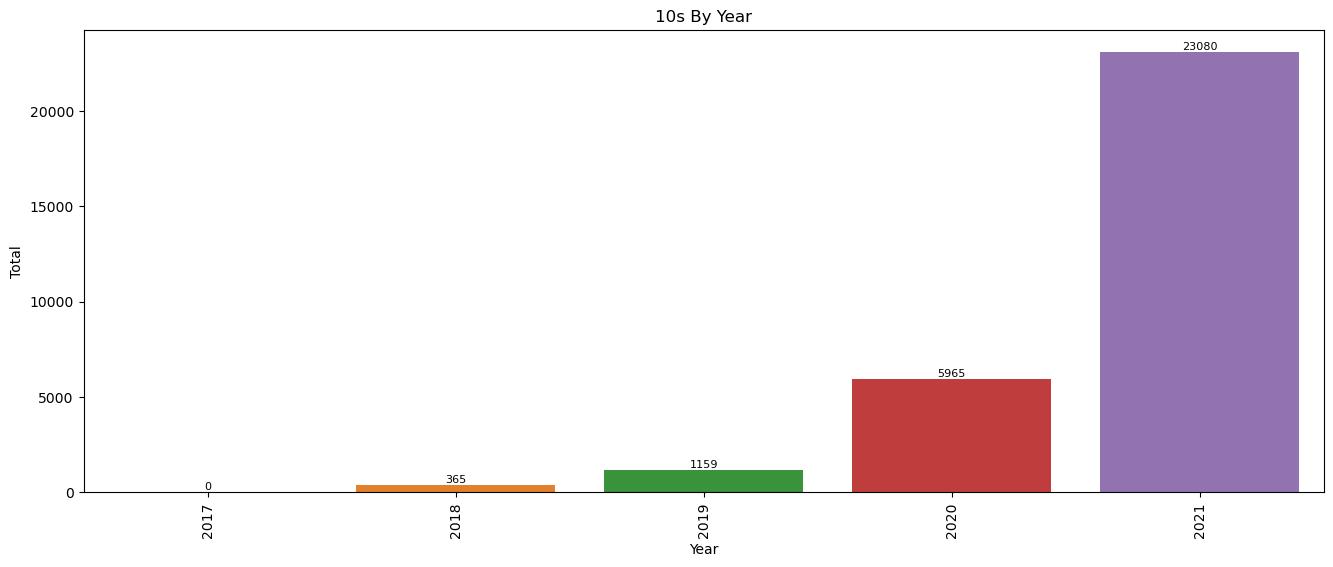

In [20]:
def plot_10s_by_year(data, subjects):
    by_year = data.groupby('Year').apply(lambda x: x[subjects].eq(10).sum()).reset_index()
    by_year['Total'] = by_year[subjects].sum(axis=1)

    plt.figure(figsize=(16, 6))
    bar = sns.barplot(x='Year', y='Total'
                      , data=by_year
                      , order=by_year.sort_values('Total', ascending=True).Year)

    plt.title('10s By Year')
    plt.xticks(rotation=90)
    
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=8)
    plt.show()
    
plot_10s_by_year(df3, subjects)

2017 was the first year the new exam format came out (multiple choice). So compare to other years, the amount of 10s were not as high. But the years later, the trend went up, showing that students gradually adapted to the change. The peak of total 10 was in 2021

## Find the qualified and unqualified examinees

In [21]:
df3['Evaluated'] = (df3[subjects] > 0).sum(axis=1) >= 3

df3['Evaluated'] = df3['Evaluated'].map({True: 'qualified', False: 'unqualified'})

df3

,ID,Mathematics,Literature,Physics,Biology,English,Year,Chemistry,History,Geography,Civics,ProvinceID,ProvinceName,Evaluated
0,8002816,7.8,8.25,7.50,7.0,6.2,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI,qualified
1,8005707,3.0,3.25,2.75,3.0,3.2,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI,qualified
2,8004883,6.0,5.25,NaN,NaN,4.8,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI,qualified
3,8004786,2.4,3.75,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI,unqualified
4,8004225,4.2,4.00,NaN,NaN,3.0,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI,qualified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194592,13003705,5.0,6.25,NaN,NaN,2.4,2020,NaN,2.75,7.00,8.25,13,TỈNH YÊN BÁI,qualified
4194593,13003706,4.8,4.50,NaN,NaN,3.0,2020,NaN,3.25,NaN,NaN,13,TỈNH YÊN BÁI,qualified
4194594,13003702,5.8,7.00,NaN,NaN,3.8,2020,NaN,6.75,7.75,9.25,13,TỈNH YÊN BÁI,qualified
4194595,13003707,5.4,5.00,NaN,NaN,3.6,2020,NaN,3.50,5.75,6.75,13,TỈNH YÊN BÁI,qualified


In [22]:
group_e = df3[['Evaluated']].value_counts().to_frame().reset_index(drop=False)

group_e = group_e.rename(columns={0:'Count'})

In [23]:
group_e

,Evaluated,Count
0,qualified,4085836
1,unqualified,108761


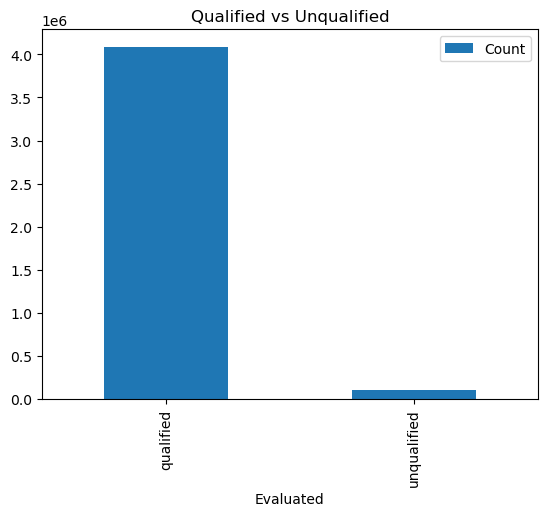

In [24]:
group_e.plot(kind='bar', x='Evaluated', y='Count', title='Qualified vs Unqualified')

plt.xticks(rotation=90)
plt.show()

### Unqualified of each year

In [25]:
unqualified = df3.groupby('Year').value_counts(['Evaluated']).to_frame().reset_index(drop=False).rename(columns={0:'Count'})\

unqualified

,Year,Evaluated,Count
0,2017,qualified,743232
1,2017,unqualified,104116
2,2018,qualified,742543
3,2018,unqualified,1853
4,2019,qualified,810831
5,2019,unqualified,1020
6,2020,qualified,869539
7,2020,unqualified,947
8,2021,qualified,919691
9,2021,unqualified,825


In [26]:
unqualified_rows = unqualified[unqualified['Evaluated'] == 'unqualified']

In [27]:
unqualified_rows1 = unqualified_rows.rename(columns={0:'Count'})

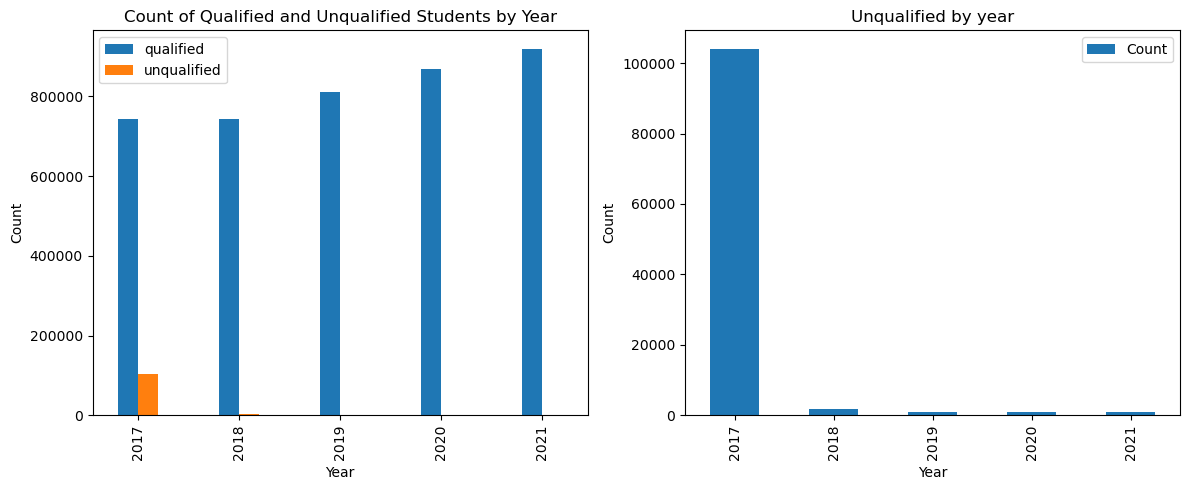

In [28]:
pivot_df = unqualified.pivot(index='Year', columns='Evaluated', values='Count')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax1 = pivot_df.plot(kind='bar', stacked=False, width=0.4, ax=axes[0])
ax1.set_xticks(np.arange(len(pivot_df.index)))
ax1.set_xticklabels(pivot_df.index)
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.set_title('Count of Qualified and Unqualified Students by Year')
ax1.legend()

ax2 = unqualified_rows.plot(kind='bar', x='Year', y='Count', ax=axes[1]) 
ax2.set_xticks(np.arange(len(pivot_df.index)))
ax2.set_xticklabels(pivot_df.index)
ax2.set_xlabel('Year')
ax2.set_ylabel('Count')
ax2.set_title('Unqualified by year')  
ax2.legend()

plt.tight_layout()
plt.show()

Overall, the entrace exam had been having a very low number of unqualified examinees in all the 5 years. 2017 had the highest number of unqualified students, which is understandable as it was the first year the new format came out. 

## Grouped results

In [29]:
# Calculate the average score for students with at least 3 non-null scores
min_subjects = 3  # Minimum number of subjects required

# Filter students with at least min_subjects non-null scores
df3_filtered = df3[df3[subjects].notnull().sum(axis=1) >= min_subjects]

# Calculate the average score for each student
df3['Average'] = round(df3_filtered[subjects].mean(axis=1),2)

In [30]:
df3['Average'].fillna(0,inplace=True)

df3

,ID,Mathematics,Literature,Physics,Biology,English,Year,Chemistry,History,Geography,Civics,ProvinceID,ProvinceName,Evaluated,Average
0,8002816,7.8,8.25,7.50,7.0,6.2,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI,qualified,7.35
1,8005707,3.0,3.25,2.75,3.0,3.2,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI,qualified,3.04
2,8004883,6.0,5.25,NaN,NaN,4.8,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI,qualified,5.35
3,8004786,2.4,3.75,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI,unqualified,0.00
4,8004225,4.2,4.00,NaN,NaN,3.0,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI,qualified,3.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194592,13003705,5.0,6.25,NaN,NaN,2.4,2020,NaN,2.75,7.00,8.25,13,TỈNH YÊN BÁI,qualified,5.28
4194593,13003706,4.8,4.50,NaN,NaN,3.0,2020,NaN,3.25,NaN,NaN,13,TỈNH YÊN BÁI,qualified,3.89
4194594,13003702,5.8,7.00,NaN,NaN,3.8,2020,NaN,6.75,7.75,9.25,13,TỈNH YÊN BÁI,qualified,6.72
4194595,13003707,5.4,5.00,NaN,NaN,3.6,2020,NaN,3.50,5.75,6.75,13,TỈNH YÊN BÁI,qualified,5.00


In [31]:
def grouped_results(data, subjects):
    qualified_indices = (data[subjects] > 0).sum(axis=1) >= 3
    data['Bracket'] = 'Unqualified'
    
    for subject in subjects:
        conditions = [
            (df3['Average'] <= 10),
            (df3['Average'] <= 9),
            (df3['Average'] <= 7.5),
            (df3['Average'] <= 5),
            (df3['Average'] <= 3.5),
            (df3['Average'] <= 1.8),
        ]
        choices = [
            'Excellent', 'Good', 'Above average', 'Average', 'Below average', 'Weak'
        ]
        data.loc[qualified_indices & conditions[0], 'Bracket'] = choices[0]
        data.loc[qualified_indices & conditions[1], 'Bracket'] = choices[1]
        data.loc[qualified_indices & conditions[2], 'Bracket'] = choices[2]
        data.loc[qualified_indices & conditions[3], 'Bracket'] = choices[3]
        data.loc[qualified_indices & conditions[4], 'Bracket'] = choices[4]
        data.loc[qualified_indices & conditions[5], 'Bracket'] = choices[5]

grouped_results(df3, subjects)

df3

,ID,Mathematics,Literature,Physics,Biology,English,Year,Chemistry,History,Geography,Civics,ProvinceID,ProvinceName,Evaluated,Average,Bracket
0,8002816,7.8,8.25,7.50,7.0,6.2,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI,qualified,7.35,Above average
1,8005707,3.0,3.25,2.75,3.0,3.2,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI,qualified,3.04,Below average
2,8004883,6.0,5.25,NaN,NaN,4.8,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI,qualified,5.35,Above average
3,8004786,2.4,3.75,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI,unqualified,0.00,Unqualified
4,8004225,4.2,4.00,NaN,NaN,3.0,2017,NaN,NaN,NaN,NaN,8,TỈNH LÀO CAI,qualified,3.73,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194592,13003705,5.0,6.25,NaN,NaN,2.4,2020,NaN,2.75,7.00,8.25,13,TỈNH YÊN BÁI,qualified,5.28,Above average
4194593,13003706,4.8,4.50,NaN,NaN,3.0,2020,NaN,3.25,NaN,NaN,13,TỈNH YÊN BÁI,qualified,3.89,Average
4194594,13003702,5.8,7.00,NaN,NaN,3.8,2020,NaN,6.75,7.75,9.25,13,TỈNH YÊN BÁI,qualified,6.72,Above average
4194595,13003707,5.4,5.00,NaN,NaN,3.6,2020,NaN,3.50,5.75,6.75,13,TỈNH YÊN BÁI,qualified,5.00,Average


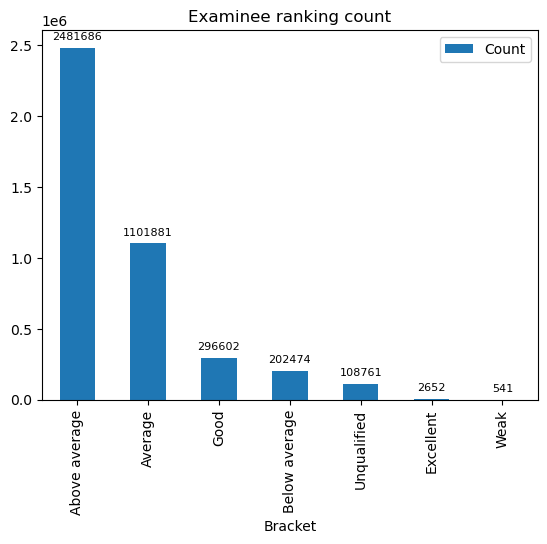

In [32]:
Bracket = df3[['Bracket']].value_counts().to_frame().reset_index(drop=False).rename(columns={0:'Count'})

plot = Bracket.plot(kind='bar', x='Bracket', y='Count', title='Examinee ranking count')

for bar in plot.patches:
    plot.annotate(
        format(bar.get_height(), '.0f'),
        (bar.get_x() + bar.get_width() / 2,
         bar.get_height()),
         ha='center' , va='center', size=8 , xytext=(0,8),
         textcoords='offset points'
        )

This could be a useful data to show the performance off all examinees. The majority had the average score from average to good. 
Those who did not attend the required number of tests were considered unqualified for performance evaluation

## Statistical analysis

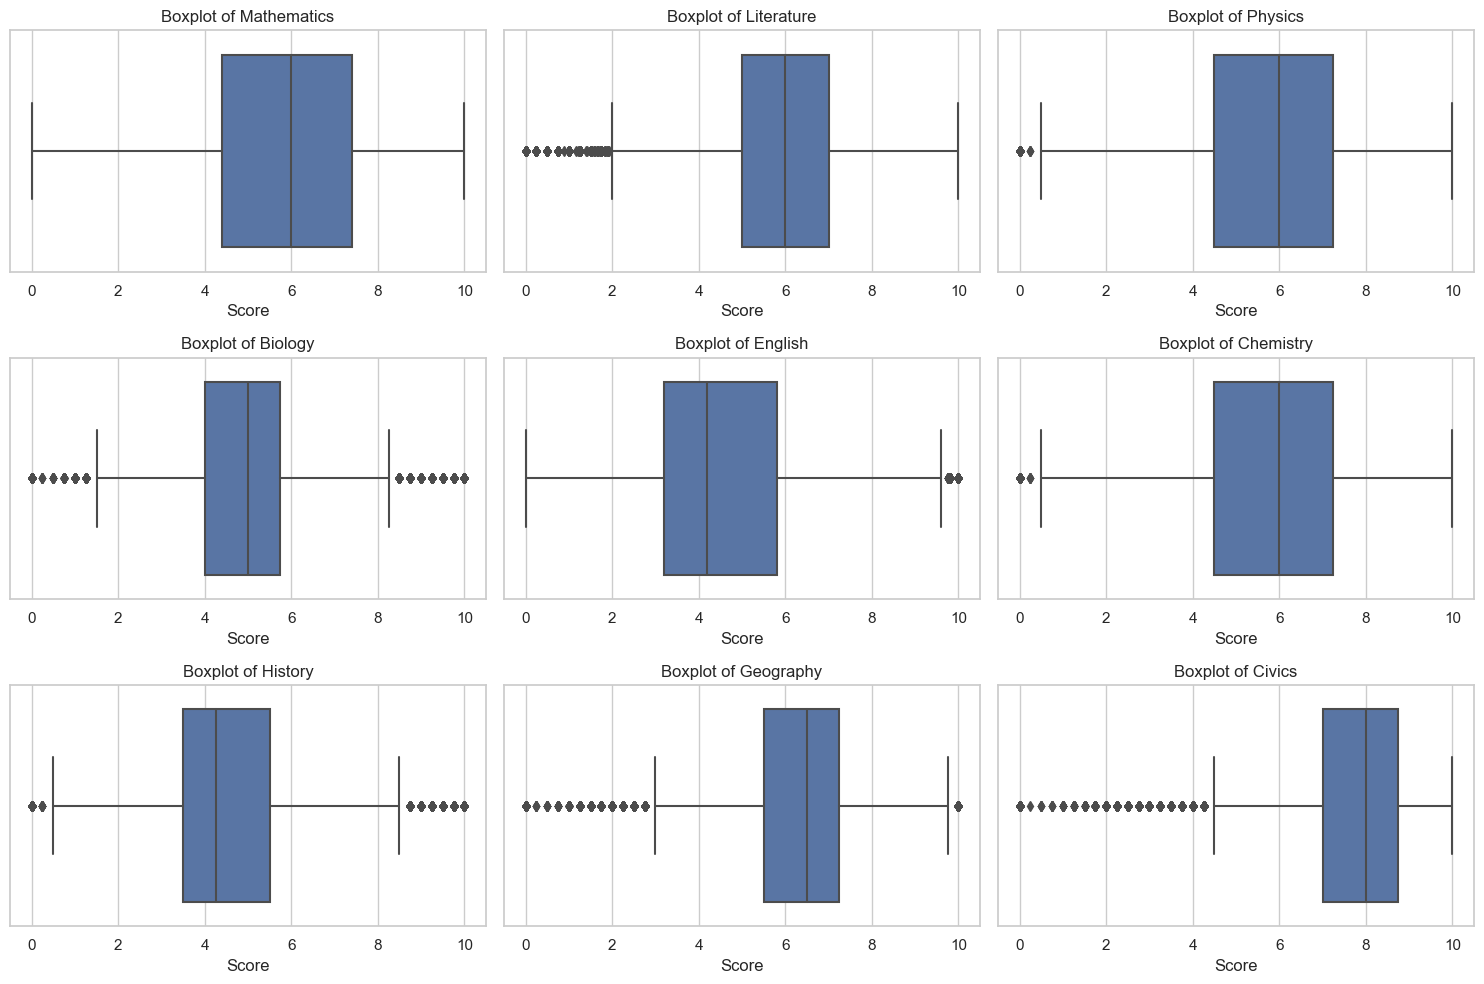

In [33]:
sns.set(style="whitegrid")

columns_to_plot = ['Mathematics', 'Literature', 'Physics', 'Biology', 'ForeignLanguage', 'Chemistry', 'History', 'Geography', 'Civics']

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

axes = axes.flatten()

for i, subject in enumerate(subjects):
    sns.boxplot(x=df3[subject], ax=axes[i])
    axes[i].set_title(f'Boxplot of {subject}')
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

As we see from these boxplots, we may notice outliers appearing in almost every test. There are serveral explanations for this: 
- Some students had an outstanding performance that led them to a higher-score bracket such as 9 or 10. 
- Some students performed purely compared to the majority of other examiees, with scores are as low as 0,1,2. 

Civics : The plot may indicate the low difficulty level of this subject, as the majority score between 7 - 9, while there are a few outliers spreading around the area from 0 to 4.3

These outliers could be an indication for a few things: 
- Exceptional performance of outstanding students
- Examinees quit the test, resulting in 0 score (usually just a few)
- Test difficulty of one test is harder than the others

## Is there an improvement in performance between each year? 

According to the characteristics of the dataset, it's best to execute ANOVA or independent t-test to decide whether the performance of examinees had gotten better since 2017 to 2021. We will look into some metrics to decide the outcome:
- null hypotheses (H0) : There's no difference in the performance of the examinees during the 5-year course
- alternative hypothesis (Ha) : There's a difference in the performance of each group 
- Alpha : 0.05
- Calculate test statistic
- State result
- State conclusion


In [34]:
from scipy.stats import stats 
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [35]:
Anova = ['ID', 'Year', 'Average']

group = df3[Anova]

group

# Take only the Average score of each student in each year for the ANOVA testing

,ID,Year,Average
0,8002816,2017,7.35
1,8005707,2017,3.04
2,8004883,2017,5.35
3,8004786,2017,0.00
4,8004225,2017,3.73
...,...,...,...
4194592,13003705,2020,5.28
4194593,13003706,2020,3.89
4194594,13003702,2020,6.72
4194595,13003707,2020,5.00


In [36]:
group2017 = group['Year'] == 2017
group2018 = group['Year'] == 2018
group2019 = group['Year'] == 2019
group2020 = group['Year'] == 2020
group2021 = group['Year'] == 2021

groups = [group2017, group2018, group2019, group2020, group2021]

anova_result = f_oneway(*groups)
anova_result

F_onewayResult(statistic=6486.90978490705, pvalue=0.0)

The p_value is as near as 0, which is a lot lower than 0.05, meaning that there's a statistically significance between each group. However, we are unsure which group causes the differences. One way to solve this problem is to conduct a posthoc test (Tukey's HSD) to identify which specific group differs significantly

In [41]:
posthoc = pairwise_tukeyhsd(group['Average'], group['Year'])
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
  2017   2018   0.5458   0.0   0.54 0.5516   True
  2017   2019    0.934   0.0 0.9283 0.9397   True
  2017   2020     1.82   0.0 1.8144 1.8256   True
  2017   2021   1.9981   0.0 1.9926 2.0036   True
  2018   2019   0.3882   0.0 0.3823 0.3941   True
  2018   2020   1.2741   0.0 1.2684 1.2799   True
  2018   2021   1.4523   0.0 1.4466  1.458   True
  2019   2020    0.886   0.0 0.8803 0.8916   True
  2019   2021   1.0641   0.0 1.0585 1.0696   True
  2020   2021   0.1781   0.0 0.1726 0.1836   True
-------------------------------------------------


Based on the Tukey's HSD pairwise table, we can clearly see a consistence increase in performance of examinees from 2017 to 2021. This could be an indicator of many potential factors, which certainly did not happen by chance but due to certain meaningful causes. 

- **emporal Trend:** There is a consistent and significant trend in the performance across the years. This could suggest that there has been a gradual improvement or decline in the metric being measured over the years.

- **External Factors:** The significant differences between years might be influenced by external factors that have changed over time, such as changes in curriculum, teaching methods, or exam difficulty.

- **Variability:** The results could indicate that the metric being measured is sensitive to various factors that are changing from year to year, leading to different performance levels.

- **Year-Specific Changes:** There may have been specific changes or events in each year that influenced the performance. Each year might have unique circumstances that lead to different outcomes.

- **Long-Term Effects:** The analysis suggests that the differences between years are not random and could have some long-term implications that are driving the variations.

Further investigation into the underlying factors are compulsory to understand carefully the impace of such results